<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Forecasting_(Data_Driven_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting : Data Driven Models**

In [23]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # Simple exponential smoothing
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
Walmart = pd.read_csv("footfalls.csv")

<Axes: >

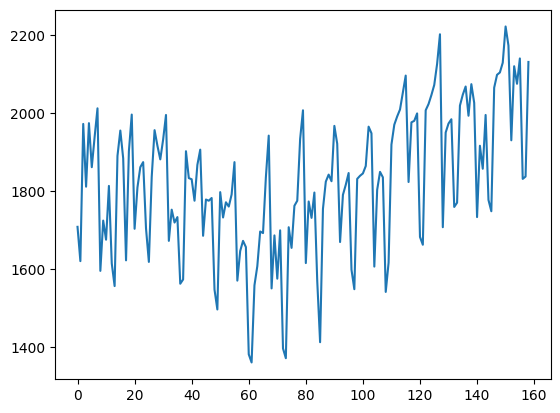

In [25]:
Walmart.Footfalls.plot()

In [26]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


# Splitting data

In [27]:
Train = Walmart.head(147)
Test = Walmart.tail(12)
Test.tail()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0
158,Mar-04,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


# Moving Average

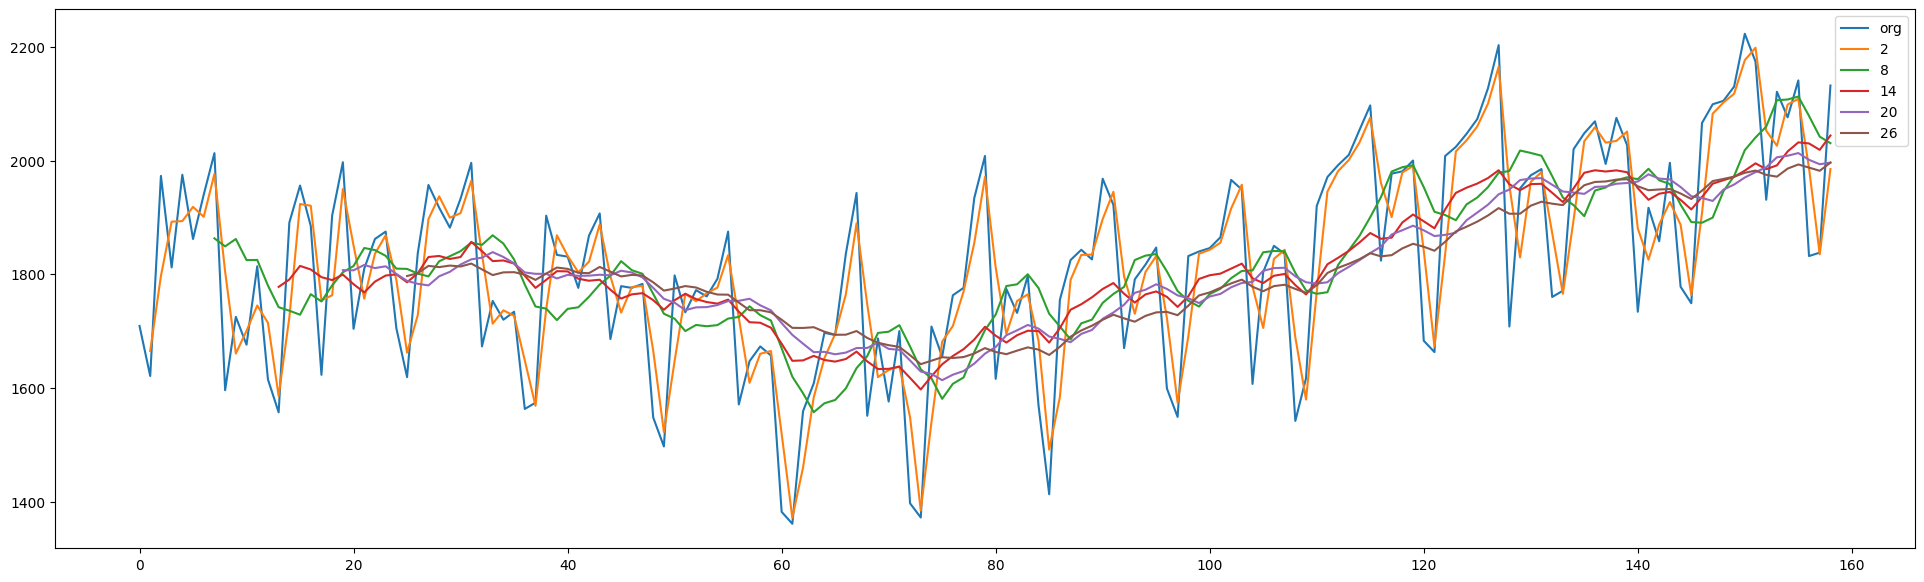

In [28]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,30,6):   #2,8,14,20,...
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot


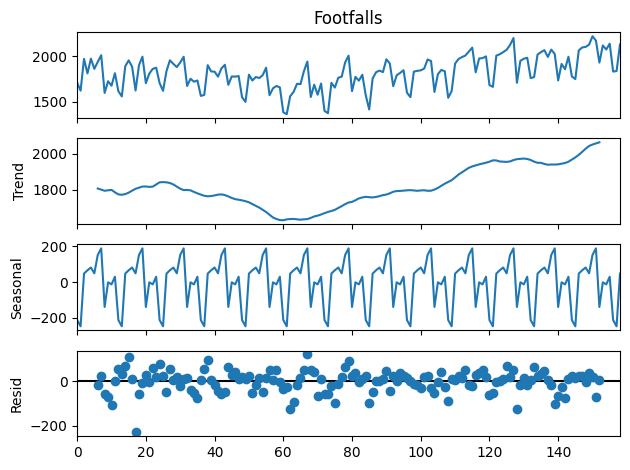

In [29]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)   #12 months
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


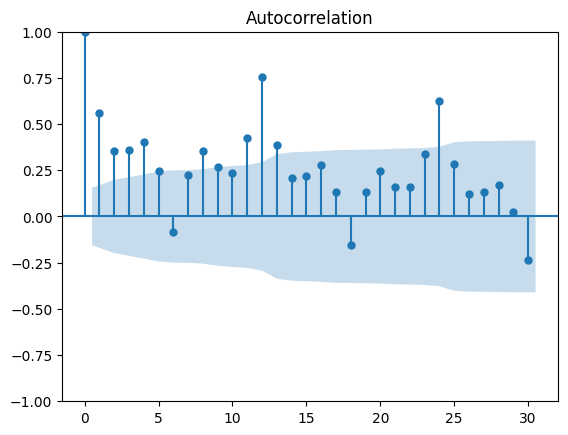

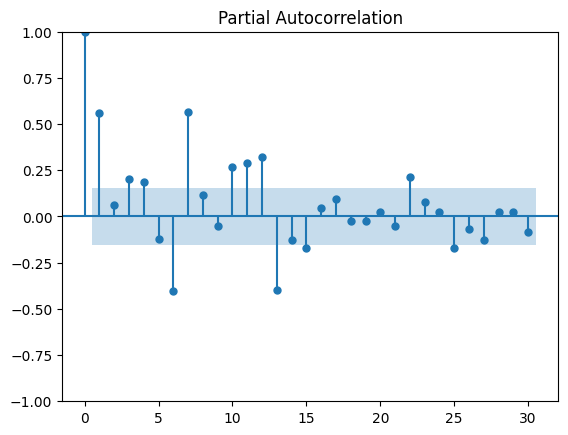

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=30)  #autocorrelation
tsa_plots.plot_pacf(Walmart.Footfalls,lags=30)  #partial correleation
plt.show()

# Evaluation Metric (MAPE)

In [31]:
#mean absolute percentage error(mape)
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [32]:
Train

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0


# Exponential Smoothing

1. Simple Exponential method
2. Holt's method
3. Winters method

### Simple Exponential Method

In [33]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.490637057828376

### Holt method

In [34]:
#Holt method
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


7.546249229496056

### Holts winter exponential smoothing with additive seasonality and additive trend


In [35]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

2.0083954068872694

In [36]:
#Holts winter exponential smoothing with additive seasonality and additive trend
#This model has less errors
#so,it is best model for our forecasting data

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [37]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.9678498441563517

# Final Model by combining train and test

In [38]:
hwe_model_add_add = ExponentialSmoothing(Walmart.Footfalls,seasonal="add",trend="add",seasonal_periods=12).fit()

In [39]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

,0
159,2153.270022
160,2180.806271
161,2155.360593
162,2244.062090
163,2274.339502
164,1965.419562
165,2125.253616
166,2106.353304
167,2152.544112
168,1903.654840


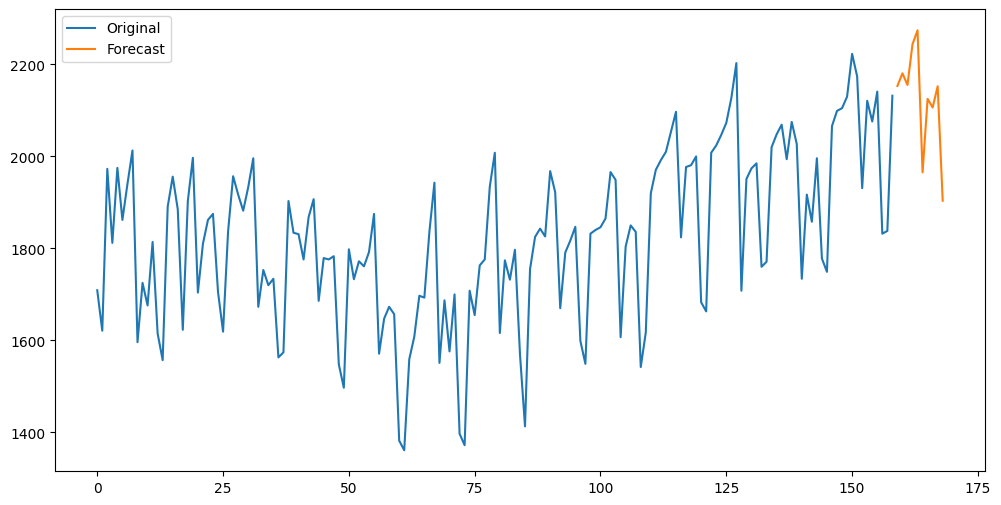

In [40]:
# Get the forecasts
forecast = hwe_model_add_add.forecast(10)

# Plot the original data and the forecasts
plt.figure(figsize=(12, 6))
plt.plot(Walmart.Footfalls, label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()